# 1.6 MILLION UK TRAFFIC ACCIDENTS
---
* We have analyzed 1.6 MILLION UK TRAFFIC ACCIDENTS dataset which consists of different features such as "Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Day_of_Week","Time","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Year","Urban_or_Rural_Area"
* In this study, we studied what features effects traffic accidents. 
* After that, we tried to predict accident rates over time.
* Finally, We determined how rural and urban areas differ. 
* Our data set is generated from kaggle : https://www.kaggle.com/datasets/daveianhickey/2000-16-traffic-flow-england-scotland-wales

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading our csv data via pandas
first_data = pd.read_csv("/content/drive/MyDrive/archive/accidents_2005_to_2007.csv",low_memory=False)
second_data = pd.read_csv("/content/drive/MyDrive/archive/accidents_2009_to_2011.csv",low_memory=False)
third_data = pd.read_csv("/content/drive/MyDrive/archive/accidents_2012_to_2014.csv",low_memory=False)


In [ ]:
#concatenate all datas to data and see first 5 data
data = pd.concat([first_data, second_data, third_data])
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [ ]:
#More info about our data
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504049e+06,1.504049e+06,1.504049e+06,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,0.0,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,4.396214e+05,3.001584e+05,-1.436625e+00,5.258940e+01,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,NaN,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,9.511616e+04,1.610084e+05,1.398078e+00,1.449889e+00,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,NaN,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.750600e+05,1.782600e+05,-2.373902e+00,5.149016e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.399600e+05,2.688300e+05,-1.403714e+00,5.230913e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.230600e+05,3.981510e+05,-2.215100e-01,5.347858e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [ ]:
#find out data types
data.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [ ]:
#get the columns we want to use
data=data.loc[:,["Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Day_of_Week","Time","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Year","Urban_or_Rural_Area"]]

In [ ]:
#check the null values and drop them
data.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Year                          0
Urban_or_Rural_Area           0
dtype: int64

In [ ]:
#after dropping null values, we need to redefine the data
data=data.dropna()
data.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Speed_limit                0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Year                       0
Urban_or_Rural_Area        0
dtype: int64

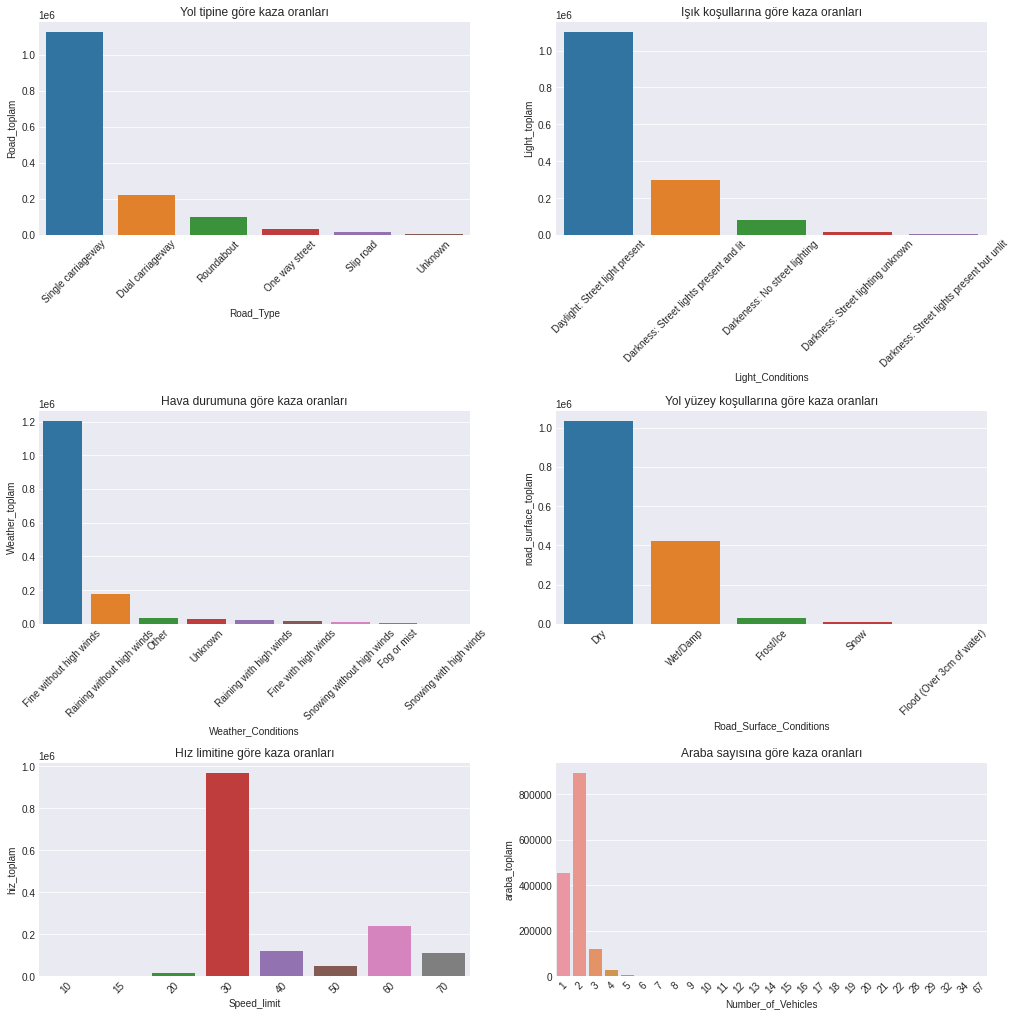

In [ ]:
#observe traffic accident according to 6 different feature
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

road_sayisi = data.groupby("Road_Type")
toplam_road=pd.DataFrame(road_sayisi.size().sort_values(ascending=False),columns=["Road_toplam"])
light_sayisi = data.groupby("Light_Conditions")
toplam_light=pd.DataFrame(light_sayisi.size().sort_values(ascending=False),columns=["Light_toplam"])
weather_sayisi = data.groupby("Weather_Conditions")
toplam_weather=pd.DataFrame(weather_sayisi.size().sort_values(ascending=False),columns=["Weather_toplam"])
surface_sayisi = data.groupby("Road_Surface_Conditions")
toplam_surface=pd.DataFrame(surface_sayisi.size().sort_values(ascending=False),columns=["road_surface_toplam"])
hiz_limiti = data.groupby("Speed_limit")
toplam_hiz=pd.DataFrame(hiz_limiti.size().sort_values(ascending=False),columns=["hiz_toplam"])
araba_sayisi = data.groupby("Number_of_Vehicles")
toplam_araba=pd.DataFrame(araba_sayisi.size().sort_values(ascending=False),columns=["araba_toplam"])
                       
                       

ax=sns.barplot(x=toplam_road.index, y=toplam_road["Road_toplam"], data=toplam_road, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_light.index,y=toplam_light["Light_toplam"], data=toplam_light, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_weather.index,y=toplam_weather["Weather_toplam"], data=toplam_weather, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_surface.index,y=toplam_surface["road_surface_toplam"], data=toplam_surface, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_hiz.index,y=toplam_hiz["hiz_toplam"], data = toplam_hiz, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x=toplam_araba.index,y=toplam_araba["araba_toplam"], data=toplam_araba, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)
axs[0, 0].title.set_text('Yol tipine göre kaza oranları')
axs[0, 1].title.set_text('Işık koşullarına göre kaza oranları')
axs[1, 0].title.set_text('Hava durumuna göre kaza oranları')
axs[1, 1].title.set_text('Yol yüzey koşullarına göre kaza oranları')
axs[2, 0].title.set_text('Hız limitine göre kaza oranları')
axs[2, 1].title.set_text('Araba sayısına göre kaza oranları')

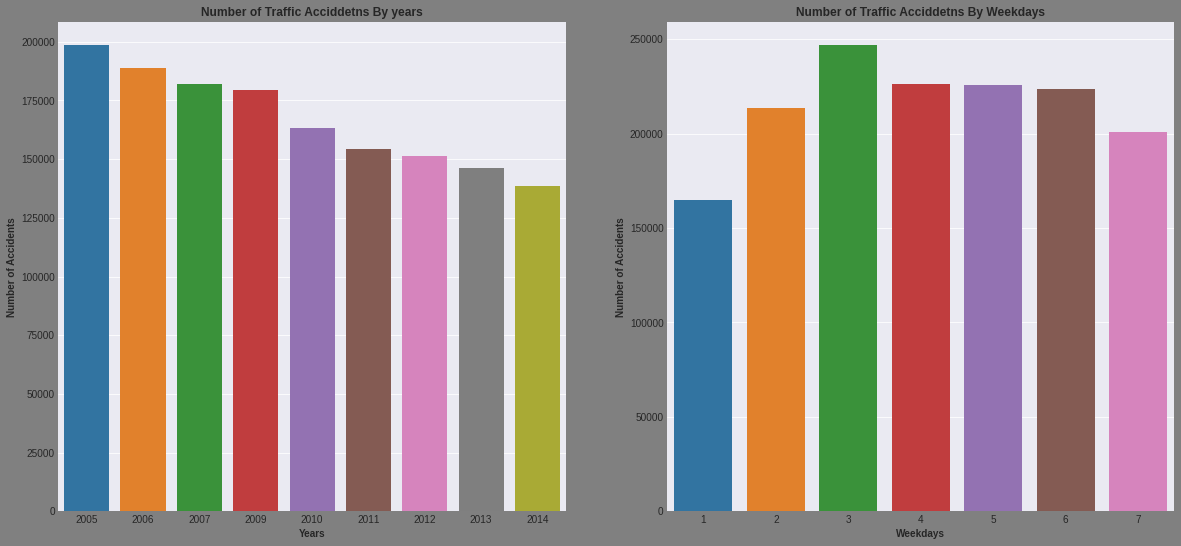

In [ ]:
#change of traffic accidents according to the days of the week and time
year = data["Year"].value_counts().values
years = data["Year"].unique()
week = data["Day_of_Week"].value_counts().values
weeks = data["Day_of_Week"].unique()
plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = year)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")

plt.title("Number of Traffic Acciddetns By years",weight="bold")

plt.subplot(1, 2, 2)

sns.barplot(x=weeks,y=week)
plt.title("Number of Traffic Acciddetns By Weekdays",weight="bold")
plt.xlabel("Weekdays",weight="bold")
plt.ylabel("Number of Accidents",weight="bold")
plt.show()

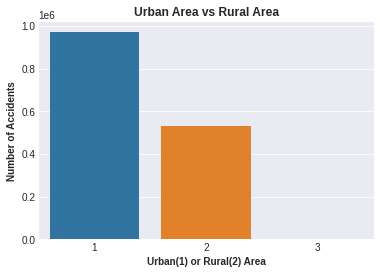

In [ ]:
#determine how rural and urban areas differ.
plt.style.use("seaborn-darkgrid")
sns.countplot(x="Urban_or_Rural_Area",data=data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")
plt.show() 

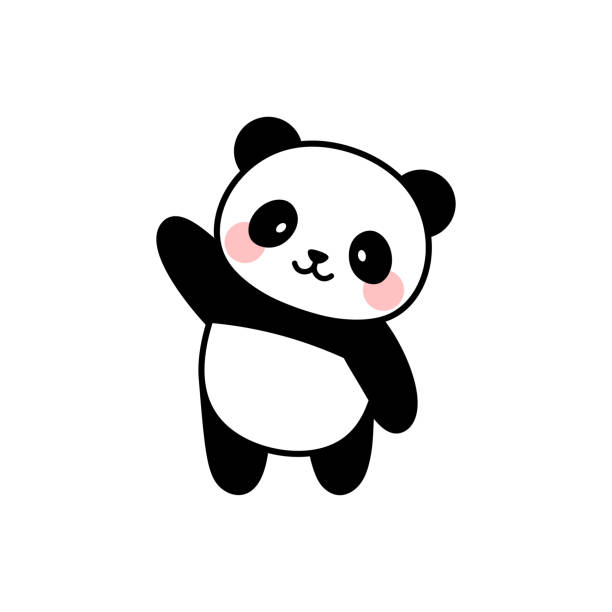